In [440]:
import pandas as pd
import re
garmin2021=pd.read_csv('Activities2021.csv')
print(garmin2021.shape)
garmin2021.head()

(263, 49)


,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Best Lap Time,Number of Laps,Max Temp,Avg Resp,Min Resp,Max Resp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Trail Running,2021-12-31 15:19:10,True,Piatra Neamt Trail Running,10.08,929,01:28:44,143,165,3.7,...,00:28.66.9,11,0.0,34,18,45,01:28:35,01:28:44,349,655
1,Hiking,2021-12-29 14:57:58,True,Piatra Neamt Hiking,7.40,475,01:43:12,95,119,1.0,...,01:43:11.61.9,1,0.0,23,12,32,01:37:22,01:43:12,341,659
2,Virtual Cycling,2021-12-26 19:23:05,True,Thio Virtual Cycling,27.31,657,00:53:15,140,159,--,...,53:15.00,1,0.0,--,--,--,00:53:13,00:53:14,10,121
3,Hiking,2021-12-25 12:02:17,True,Piatra Neamt Hiking,8.25,581,01:38:28,107,145,2.2,...,01:38:27.92.3,1,0.0,--,--,--,01:36:21,01:38:28,351,659
4,Trail Running,2021-12-23 13:14:26,True,Piatra Neamt Trail Running,12.10,960,01:26:54,141,173,3.8,...,00:38.60.1,13,0.0,34,14,49,01:26:46,01:26:54,343,679


In [441]:
#Keeping only relevant columns 
garmin2021 = garmin2021[['Activity Type','Date','Distance','Calories','Avg HR','Total Ascent','Elapsed Time']]
print(garmin2021.shape)
garmin2021.head()

(263, 7)


,Activity Type,Date,Distance,Calories,Avg HR,Total Ascent,Elapsed Time
0,Trail Running,2021-12-31 15:19:10,10.08,929,143,687,01:28:44
1,Hiking,2021-12-29 14:57:58,7.40,475,95,361,01:43:12
2,Virtual Cycling,2021-12-26 19:23:05,27.31,657,140,262,00:53:14
3,Hiking,2021-12-25 12:02:17,8.25,581,107,373,01:38:28
4,Trail Running,2021-12-23 13:14:26,12.10,960,141,573,01:26:54


In [442]:
#Dropping swimming and strength training activities because they are very few
garmin2021 = garmin2021.loc[(garmin2021['Activity Type'] != 'Open Water Swimming')&(garmin2021['Activity Type']!='Strength Training')]
print(garmin2021.shape)
print(garmin2021['Activity Type'].unique())

(260, 7)
['Trail Running' 'Hiking' 'Virtual Cycling' 'Running' 'Cycling'
 'Track Running' 'Ultra Running' 'Mountain Biking']


In [443]:
#Converting activity types into three main categories: Running, Cycling, Hiking 
dict={'Trail Running':'Running','Virtual Cycling':'Cycling','Track Running':'Running','Ultra Running':'Running',
      'Mountain Biking':'Cycling'}
garmin2021=garmin2021.replace({'Activity Type': dict})
garmin2021['Activity Type'].unique()

array(['Running', 'Hiking', 'Cycling'], dtype=object)

In [444]:
#Transforming distance values from comma format in point format, to have them as float
garmin2021['Distance']=garmin2021.apply(lambda row: float(re.sub(',', '.', row['Distance'])),axis=1)
print(garmin2021['Distance'].dtype)
#Finding the total distance and distances/activity.type in 2021
print('Total dist: ' + str(garmin2021['Distance'].sum())+'KM')
print('Running dist: ' + str(garmin2021[garmin2021['Activity Type']=='Running']['Distance'].sum())+'KM')
print('Cycling dist: ' + str(garmin2021[garmin2021['Activity Type']=='Cycling']['Distance'].sum())+'KM')
print('Hiking dist: ' + str(garmin2021[garmin2021['Activity Type']=='Hiking']['Distance'].sum())+'KM')

float64
Total dist: 4248.35KM
Running dist: 2540.48KM
Cycling dist: 1268.73KM
Hiking dist: 439.14KM


In [445]:
#Replacing Nan values from calories column with 0
#Removing decimals from calories values to have them as integers
garmin2021['Calories'] = garmin2021.apply(lambda row: re.sub('--', '0', row['Calories']),axis=1)
garmin2021['Calories'] = garmin2021.apply(lambda row: int(re.sub(',', '', row['Calories'])),axis=1)
print(garmin2021['Calories'].dtype)
#Finding the total calories burned in 2021
print('Total calories: '+str(garmin2021['Calories'].sum())+' Cal')

int64
Total calories: 248534 Cal


In [446]:
garmin2021['Avg HR'].dtype

dtype('int64')

In [447]:
#Removing decimals from total ascent values to have them as integer
garmin2021['Total Ascent'] = garmin2021.apply(lambda row: int(re.sub(',', '', row['Total Ascent'])),axis=1)
#Find the total ascent in 2021
print('Total ascent: '+str(garmin2021['Total Ascent'].sum())+'m')

Total ascent: 157141m


In [448]:
#Converting date from string to datetime
import datetime
garmin2021['Date'] = pd.to_datetime(garmin2021['Date'])
garmin2021['Date'].dtype       

dtype('<M8[ns]')

In [449]:
#Creating a new column called 'average slope' showing two decimals
garmin2021['Avg Slope%']=garmin2021.apply(lambda row: round(row['Total Ascent']/row['Distance']/10,2), axis=1)
garmin2021.head()

,Activity Type,Date,Distance,Calories,Avg HR,Total Ascent,Elapsed Time,Avg Slope%
0,Running,2021-12-31 15:19:10,10.08,929,143,687,01:28:44,6.82
1,Hiking,2021-12-29 14:57:58,7.40,475,95,361,01:43:12,4.88
2,Cycling,2021-12-26 19:23:05,27.31,657,140,262,00:53:14,0.96
3,Hiking,2021-12-25 12:02:17,8.25,581,107,373,01:38:28,4.52
4,Running,2021-12-23 13:14:26,12.10,960,141,573,01:26:54,4.74


In [450]:
#Creating a new column called 'elapsed time' with values in minutes
def time_in_minutes(x):
    return int(x.split(':')[0])*60 + int(x.split(':')[1])
garmin2021['Elapsed_min'] = garmin2021['Elapsed Time'].map(lambda x:time_in_minutes(x))
garmin2021.head()

,Activity Type,Date,Distance,Calories,Avg HR,Total Ascent,Elapsed Time,Avg Slope%,Elapsed_min
0,Running,2021-12-31 15:19:10,10.08,929,143,687,01:28:44,6.82,88
1,Hiking,2021-12-29 14:57:58,7.40,475,95,361,01:43:12,4.88,103
2,Cycling,2021-12-26 19:23:05,27.31,657,140,262,00:53:14,0.96,53
3,Hiking,2021-12-25 12:02:17,8.25,581,107,373,01:38:28,4.52,98
4,Running,2021-12-23 13:14:26,12.10,960,141,573,01:26:54,4.74,86


In [451]:
#Creating a new column called 'Cal/min'
garmin2021['Cal/min'] = round(garmin2021['Calories']/garmin2021['Elapsed_min'], 2)
# garmin2021.head()

In [452]:
#Finding the top ten activities by distance
garmin2021.nlargest(10, 'Distance')

,Activity Type,Date,Distance,Calories,Avg HR,Total Ascent,Elapsed Time,Avg Slope%,Elapsed_min,Cal/min
66,Running,2021-09-17 06:04:48,158.04,12108,110,6670,30:07:27,4.22,1807,6.70
93,Running,2021-07-30 08:59:41,79.12,7101,114,4659,16:59:00,5.89,1019,6.97
186,Running,2021-04-11 08:00:03,52.50,3726,133,1797,07:33:41,3.42,453,8.23
14,Running,2021-12-01 08:00:30,51.40,3919,151,1878,05:02:40,3.65,302,12.98
108,Running,2021-07-10 09:29:20,51.06,3777,124,2286,07:53:03,4.48,473,7.99
119,Cycling,2021-06-24 10:54:39,50.78,818,97,126,02:38:11,0.25,158,5.18
124,Running,2021-06-19 10:05:47,50.02,3719,141,2616,06:18:22,5.23,378,9.84
239,Cycling,2021-02-04 15:08:33,43.76,973,122,745,02:03:01,1.70,123,7.91
147,Cycling,2021-05-20 15:26:23,42.24,1083,110,1075,02:51:58,2.54,171,6.33
118,Running,2021-06-26 10:00:44,42.21,2269,140,515,04:02:42,1.22,242,9.38


In [453]:
#Finding the top five running activities by total ascent
garmin2021[garmin2021['Activity Type'] == 'Running'].nlargest(5, 'Total Ascent')

,Activity Type,Date,Distance,Calories,Avg HR,Total Ascent,Elapsed Time,Avg Slope%,Elapsed_min,Cal/min
66,Running,2021-09-17 06:04:48,158.04,12108,110,6670,30:07:27,4.22,1807,6.70
93,Running,2021-07-30 08:59:41,79.12,7101,114,4659,16:59:00,5.89,1019,6.97
124,Running,2021-06-19 10:05:47,50.02,3719,141,2616,06:18:22,5.23,378,9.84
108,Running,2021-07-10 09:29:20,51.06,3777,124,2286,07:53:03,4.48,473,7.99
14,Running,2021-12-01 08:00:30,51.40,3919,151,1878,05:02:40,3.65,302,12.98


In [454]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

In [455]:
#Spliting the database in three databases by activity type
garmin2021 = garmin2021.set_index('Date')
g2021R = garmin2021[garmin2021['Activity Type']=='Running']
g2021C = garmin2021[garmin2021['Activity Type']=='Cycling']
g2021H = garmin2021[garmin2021['Activity Type']=='Hiking']
# garmin2021.head()

<IPython.core.display.Javascript object>


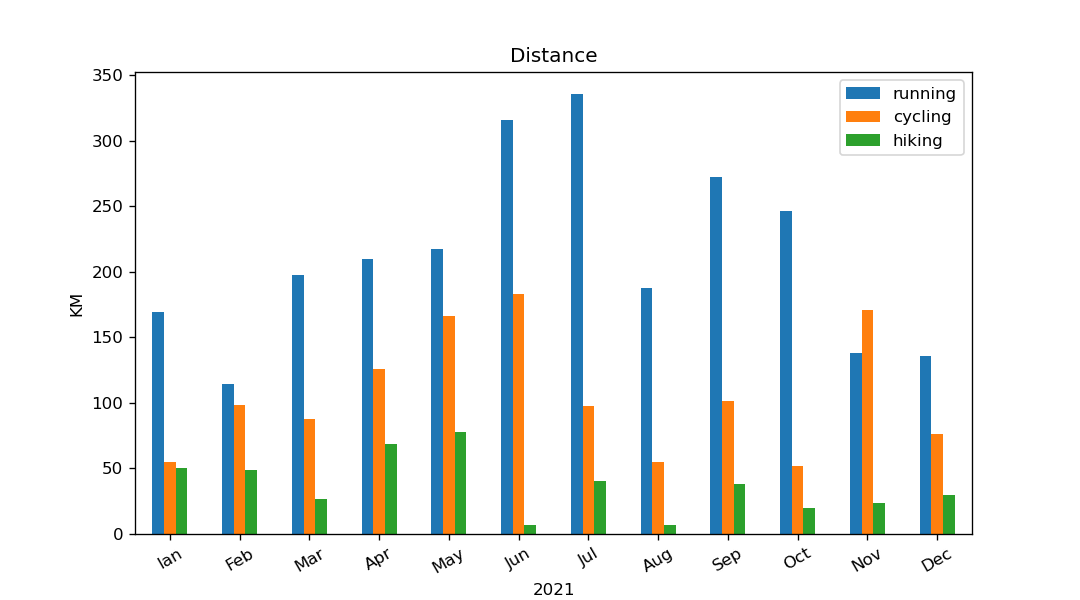

Text(0, 0.5, 'KM')

In [456]:
#Ploting a bar chart showing the total distance for each type of activity per month in 2021
mpl.style.use('default')
plotdata = pd.DataFrame({
    "running":list(g2021R['Distance'].groupby(g2021R['Distance'].index.month).sum()),
    "cycling":list(g2021C['Distance'].groupby(g2021C['Distance'].index.month).sum()),
    "hiking":list(g2021H['Distance'].groupby(g2021H['Distance'].index.month).sum())
    }, index=["Ian", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plotdata.plot(kind="bar", figsize= (9,5))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Distance")
plt.xlabel("2021")
plt.ylabel("KM")

<IPython.core.display.Javascript object>


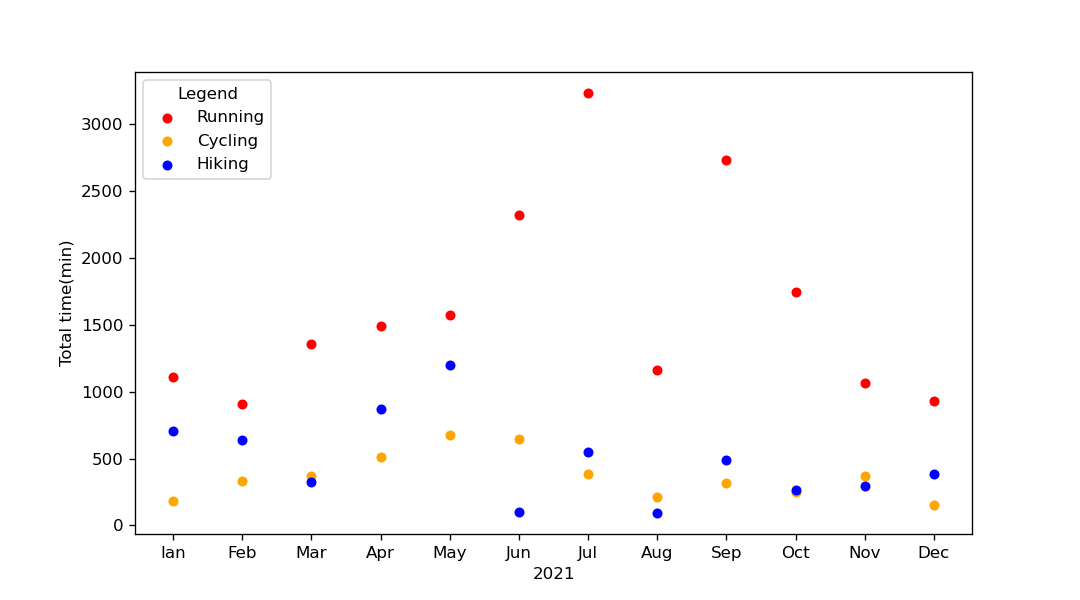

In [457]:
#Ploting a scatter chart showing the total time for each type of activity per month in 2021
index=["Ian", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
x1 = list(g2021R['Elapsed_min'].groupby(g2021R['Elapsed_min'].index.month).sum())
plt.figure(figsize =(9, 5))
plt.scatter(index, x1, s=25, c='red', label='Running')
x2 = list(g2021C['Elapsed_min'].groupby(g2021C['Elapsed_min'].index.month).sum())
plt.scatter(index, x2, s=25, c='orange', label='Cycling')
x3 = list(g2021H['Elapsed_min'].groupby(g2021H['Elapsed_min'].index.month).sum())
plt.scatter(index, x3, s=25, c='blue', label='Hiking')
plt.xlabel("2021")
plt.ylabel("Total time(min)")
plt.legend(loc = 2, frameon = True, title = 'Legend')

In [458]:
#Creating a new df g2021cal which contains only a few columns from garmin2021
garmin2021.reset_index(inplace = True)
g2021cal = garmin2021[garmin2021['Activity Type']=='Running'][['Date','Distance','Calories','Avg HR', 'Elapsed_min', 'Cal/min']]
g2021cal.head()

,Date,Distance,Calories,Avg HR,Elapsed_min,Cal/min
0,2021-12-31 15:19:10,10.08,929,143,88,10.56
4,2021-12-23 13:14:26,12.10,960,141,86,11.16
5,2021-12-20 14:59:32,12.32,975,123,108,9.03
6,2021-12-19 09:04:13,11.41,853,130,86,9.92
7,2021-12-15 15:04:23,13.12,1068,146,89,12.00


In [459]:
#Dropping rows that refer to first half of the year when I measured my heart rate with a less accurate HRM
#Keeping only the first activities by calories burned per minute
g2021cal = g2021cal[g2021cal.Date > '2021-07-01 00:00:00']
index = pd.Index(list(range(1,11)))
g2021cal = g2021cal.nlargest(10, 'Cal/min').set_index(index)
g2021cal

,Date,Distance,Calories,Avg HR,Elapsed_min,Cal/min
1,2021-10-16 11:02:00,7.10,484,156,33,14.67
2,2021-09-28 17:07:02,10.02,651,155,46,14.15
3,2021-10-25 18:43:47,10.01,681,148,49,13.90
4,2021-10-31 08:32:01,42.20,2732,153,199,13.73
5,2021-10-05 16:40:54,16.11,1085,148,79,13.73
6,2021-07-29 07:07:47,3.62,272,150,20,13.60
7,2021-08-20 09:03:03,9.03,599,149,45,13.31
8,2021-12-01 08:00:30,51.40,3919,151,302,12.98
9,2021-09-29 18:10:11,10.01,648,142,50,12.96
10,2021-08-18 08:57:16,9.27,625,142,50,12.50


<IPython.core.display.Javascript object>


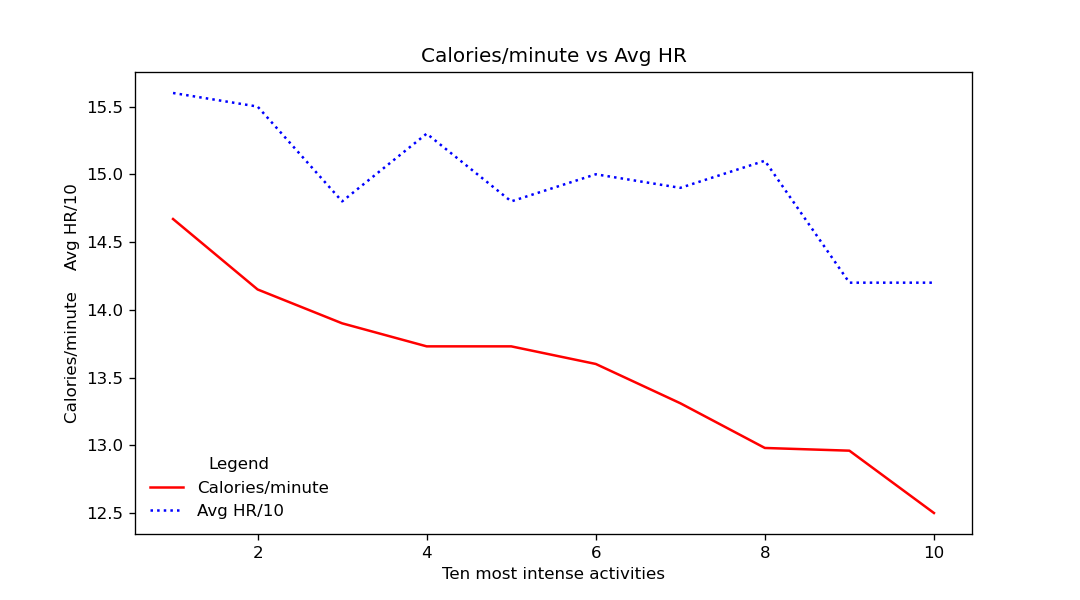

In [460]:
#Ploting a line chart in order to to check if there is a connection between the average heart rate
#and the number of calories burned
#The obvious conclusion is that more calories are burned during activities with higher heart rates
plt.figure(figsize =(9, 5))
ax = plt.axes()
plt.plot(index, g2021cal['Cal/min'], '-r', label="Calories/minute")
plt.plot(index, g2021cal['Avg HR']/10, ':b', label='Avg HR/10')
plt.title("Calories/minute vs Avg HR")
plt.xlabel("Ten most intense activities")
plt.ylabel("Calories/minute    Avg HR/10")
plt.legend(loc = 3, frameon = False, title = 'Legend')

In [461]:
#Calculating the correlation between cal/min and avg hr in order to argue the above conclusion
import numpy as np
import scipy.stats
x = garmin2021['Cal/min']
y = garmin2021['Avg HR']
r = np.corrcoef(x, y)
print(r[0, 1]) #Pearson correlation coefficient
print(r[1, 0]) #Pearson correlation coefficient
print(scipy.stats.pearsonr(x, y))   # Pearson's r
print(scipy.stats.spearmanr(x, y))   # Spearman's rho
print(scipy.stats.kendalltau(x, y))  # Kendall's tau

0.8135672562008498
0.8135672562008499
(0.8135672562008496, 1.0781330832100346e-62)
SpearmanrResult(correlation=0.8757068309742584, pvalue=1.495618461496533e-83)
KendalltauResult(correlation=0.7446804930582128, pvalue=1.8182347990238783e-70)
